In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

###  1.Load and visualize dataset (optional PCA for 2D view).

In [10]:
df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [11]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


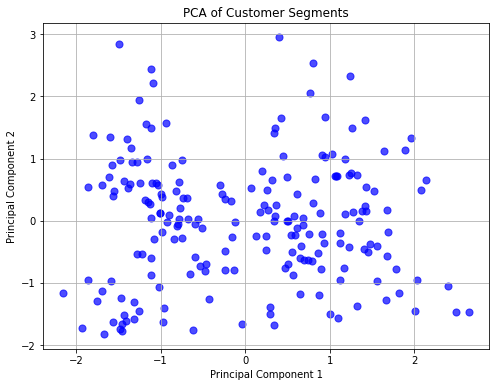

In [12]:
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']    #'CustomerID' and 'Cluster'
X = df[features]
scaler = StandardScaler() #PCA Data
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce the dimensions to 2 (for 2D visualization)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
# Create a DataFrame with the PCA components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Visualizing the 2D PCA plot
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], s=50, alpha=0.7, c='blue')  # Default scatter plot

plt.title('PCA of Customer Segments')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

### 2.Fit K-Means and assign cluster labels.

In [13]:
# Fit KMeans model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X_scaled)

# Assign the cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_

# Preview the updated DataFrame with assigned clusters
print(df[['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']].head())

   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0           1   19                  15                      39        4
1           2   21                  15                      81        4
2           3   20                  16                       6        3
3           4   23                  16                      77        4
4           5   31                  17                      40        4


### 3.Use the Elbow Method to find optimal K.

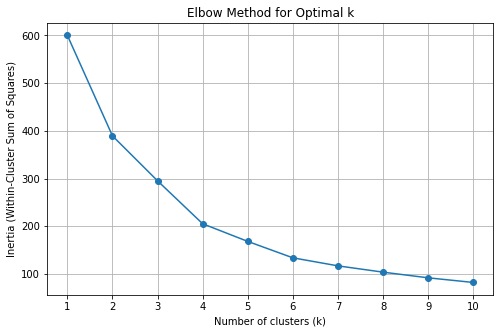

In [14]:
# Try different values of k
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

### 4.Visualize clusters with color-coding.

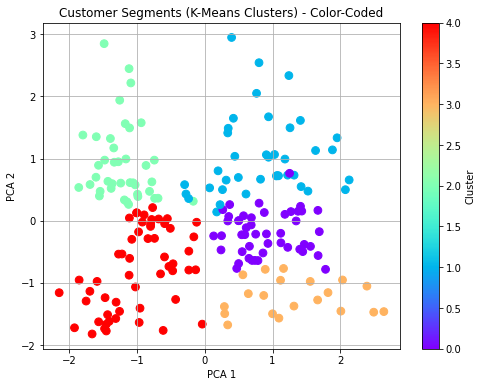

In [15]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters with color-coding based on the 'Cluster' labels
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='rainbow', s=60)
plt.title('Customer Segments (K-Means Clusters) - Color-Coded')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


### 5.Evaluate clustering using Silhouette Score

In [16]:
sil_score = silhouette_score(X_scaled, df['Cluster'])
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.4166
